<a href="https://colab.research.google.com/github/MHassaanButt/Impact-of-Covid-on-IT-companies-stock-exchange-shares/blob/main/covid_impact_on_stock_exchange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
%matplotlib inline

In [3]:
covid_cases_df=pd.read_csv('/content/drive/MyDrive/Covid/owid-covid-data.csv')

In [4]:
covid_cases_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
covid_cases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184054 entries, 0 to 184053
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    184054 non-null  object 
 1   continent                                   173305 non-null  object 
 2   location                                    184054 non-null  object 
 3   date                                        184054 non-null  object 
 4   total_cases                                 177201 non-null  float64
 5   new_cases                                   177023 non-null  float64
 6   new_cases_smoothed                          175854 non-null  float64
 7   total_deaths                                158911 non-null  float64
 8   new_deaths                                  158917 non-null  float64
 9   new_deaths_smoothed                         157760 non-null  float64
 

In [6]:
rows, columns = covid_cases_df.shape
print(f'Dimensions of Global-COVID-Cases-Dataset: Rows: {rows}, Columns: {columns}')
covid_cases_df.columns = ['-'.join(col_name.strip().split('_')) for col_name in covid_cases_df.columns]
covid_cases_df.fillna(0, inplace = True)
covid_cases_df = covid_cases_df.astype({'total-cases': np.int64, 'new-cases': np.int64, 'total-deaths': np.int64, 'new-deaths': np.int64})
covid_cases_df

Dimensions of Global-COVID-Cases-Dataset: Rows: 184054, Columns: 67


,iso-code,continent,location,date,total-cases,new-cases,new-cases-smoothed,total-deaths,new-deaths,new-deaths-smoothed,...,female-smokers,male-smokers,handwashing-facilities,hospital-beds-per-thousand,life-expectancy,human-development-index,excess-mortality-cumulative-absolute,excess-mortality-cumulative,excess-mortality,excess-mortality-cumulative-per-million
0,AFG,Asia,Afghanistan,2020-02-24,5,5,0.000,0,0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-02-25,5,0,0.000,0,0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-02-26,5,0,0.000,0,0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-02-27,5,0,0.000,0,0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-02-28,5,0,0.000,0,0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184049,ZWE,Africa,Zimbabwe,2022-05-01,247911,36,55.286,5469,0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0
184050,ZWE,Africa,Zimbabwe,2022-05-02,247935,24,48.143,5470,1,0.286,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0
184051,ZWE,Africa,Zimbabwe,2022-05-03,247990,55,46.143,5470,0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0
184052,ZWE,Africa,Zimbabwe,2022-05-04,248050,60,45.857,5471,1,0.286,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0


In [7]:
covid_cases_df.describe()

,total-cases,new-cases,new-cases-smoothed,total-deaths,new-deaths,new-deaths-smoothed,total-cases-per-million,new-cases-per-million,new-cases-smoothed-per-million,total-deaths-per-million,...,female-smokers,male-smokers,handwashing-facilities,hospital-beds-per-thousand,life-expectancy,human-development-index,excess-mortality-cumulative-absolute,excess-mortality-cumulative,excess-mortality,excess-mortality-cumulative-per-million
count,1.840540e+05,1.840540e+05,1.840540e+05,1.840540e+05,184054.000000,184054.000000,184054.000000,184054.000000,184054.000000,184054.000000,...,184054.000000,184054.000000,184054.000000,184054.000000,184054.000000,184054.000000,1.840540e+05,184054.000000,184054.000000,184054.000000
mean,2.940003e+06,1.194776e+04,1.190368e+04,5.403030e+04,140.698339,140.478364,36021.052213,175.171099,174.037354,484.137630,...,6.654095,20.212081,20.683777,2.215830,68.861012,0.583785,1.357814e+03,0.332523,0.543155,37.168128
std,1.874634e+07,8.655723e+04,8.473553e+04,3.044163e+05,749.724424,731.511217,68665.602521,738.572521,563.042894,809.298761,...,9.827672,19.156980,32.219609,2.489103,19.547922,0.317286,2.166498e+04,3.458928,6.125151,345.521751
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,1.587000e+03,0.000000e+00,4.000000e+00,2.100000e+01,0.000000,0.000000,507.358250,0.000000,0.934000,6.001500,...,0.000000,0.000000,0.000000,0.000000,66.700000,0.480000,0.000000e+00,0.000000,0.000000,0.000000
50%,2.636950e+04,5.900000e+01,8.257100e+01,3.970000e+02,0.000000,1.000000,4844.930000,8.464000,15.189000,79.942000,...,1.600000,19.100000,0.000000,1.500000,74.480000,0.707000,0.000000e+00,0.000000,0.000000,0.000000
75%,3.228118e+05,9.570000e+02,1.029535e+03,5.707750e+03,12.000000,13.571000,43211.135000,94.584750,116.845500,632.201000,...,9.500000,35.600000,36.791000,3.280000,78.880000,0.814000,0.000000e+00,0.000000,0.000000,0.000000
max,5.161695e+08,4.089131e+06,3.437057e+06,6.247502e+06,18144.000000,14783.286000,706541.904000,51427.491000,16052.608000,6382.186000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.213593e+06,111.010000,375.000000,9713.883035


In [8]:
columns_of_interest = covid_cases_df.columns[3:16]
world_covid_cases_df = covid_cases_df.loc[covid_cases_df.location == 'World', columns_of_interest]
world_covid_cases_df.reset_index(inplace = True)
world_covid_cases_df.drop(['index'], axis = 1, inplace = True)
world_covid_cases_df['Type'] = ['WORLD-COVID-19'] * len(world_covid_cases_df)
world_covid_cases_df

,date,total-cases,new-cases,new-cases-smoothed,total-deaths,new-deaths,new-deaths-smoothed,total-cases-per-million,new-cases-per-million,new-cases-smoothed-per-million,total-deaths-per-million,new-deaths-per-million,new-deaths-smoothed-per-million,Type
0,2020-01-22,557,0,0.000,17,0,0.000,0.071,0.000,0.000,0.002,0.000,0.000,WORLD-COVID-19
1,2020-01-23,657,100,0.000,18,1,0.000,0.083,0.013,0.000,0.002,0.000,0.000,WORLD-COVID-19
2,2020-01-24,944,287,0.000,26,8,0.000,0.120,0.036,0.000,0.003,0.001,0.000,WORLD-COVID-19
3,2020-01-25,1437,493,0.000,42,16,0.000,0.182,0.063,0.000,0.005,0.002,0.000,WORLD-COVID-19
4,2020-01-26,2120,683,0.000,56,14,0.000,0.269,0.087,0.000,0.007,0.002,0.000,WORLD-COVID-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,2022-05-01,513805783,326740,591956.000,6236553,915,2599.000,65245.463,41.491,75.169,791.947,0.116,0.330,WORLD-COVID-19
831,2022-05-02,514269025,463242,574385.571,6238328,1783,2509.143,65304.287,58.825,72.938,792.172,0.226,0.319,WORLD-COVID-19
832,2022-05-03,514975396,709771,582512.857,6240940,2628,2263.857,65393.986,90.130,73.970,792.504,0.334,0.287,WORLD-COVID-19
833,2022-05-04,515594423,619027,550363.714,6244913,3973,2323.000,65472.593,78.607,69.888,793.008,0.505,0.295,WORLD-COVID-19


In [9]:
world_covid_cases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   date                             835 non-null    object 
 1   total-cases                      835 non-null    int64  
 2   new-cases                        835 non-null    int64  
 3   new-cases-smoothed               835 non-null    float64
 4   total-deaths                     835 non-null    int64  
 5   new-deaths                       835 non-null    int64  
 6   new-deaths-smoothed              835 non-null    float64
 7   total-cases-per-million          835 non-null    float64
 8   new-cases-per-million            835 non-null    float64
 9   new-cases-smoothed-per-million   835 non-null    float64
 10  total-deaths-per-million         835 non-null    float64
 11  new-deaths-per-million           835 non-null    float64
 12  new-deaths-smoothed-pe

In [10]:
country_wise_covid_cases_df = covid_cases_df.loc[(covid_cases_df.location != 'World') & (covid_cases_df.date <= '2020-03-31'), covid_cases_df.columns[:16]]
country_wise_covid_cases_df.reset_index(inplace = True)
country_wise_covid_cases_df.drop(['index'], axis = 1, inplace = True)
country_wise_covid_cases_df.head()

,iso-code,continent,location,date,total-cases,new-cases,new-cases-smoothed,total-deaths,new-deaths,new-deaths-smoothed,total-cases-per-million,new-cases-per-million,new-cases-smoothed-per-million,total-deaths-per-million,new-deaths-per-million,new-deaths-smoothed-per-million
0,AFG,Asia,Afghanistan,2020-02-24,5,5,0.0,0,0,0.0,0.126,0.126,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-02-25,5,0,0.0,0,0,0.0,0.126,0.000,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-02-26,5,0,0.0,0,0,0.0,0.126,0.000,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-02-27,5,0,0.0,0,0,0.0,0.126,0.000,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-02-28,5,0,0.0,0,0,0.0,0.126,0.000,0.0,0.0,0.0,0.0


In [11]:
cwcc=country_wise_covid_cases_df.copy()
cwcc['continent'] = cwcc['continent'].replace([0],'Antarctica')

In [12]:
px.pie(cwcc,names='continent',title='Covid Cases Ratio in Different Contents')

In [13]:
uk_covid_cases_df = covid_cases_df.loc[covid_cases_df.location == 'United Kingdom', columns_of_interest]
uk_covid_cases_df.reset_index(inplace = True)
uk_covid_cases_df.drop(['index'], axis = 1, inplace = True)
uk_covid_cases_df['Type'] = ['UK-COVID-19'] * len(uk_covid_cases_df)
uk_covid_cases_df.head()

,date,total-cases,new-cases,new-cases-smoothed,total-deaths,new-deaths,new-deaths-smoothed,total-cases-per-million,new-cases-per-million,new-cases-smoothed-per-million,total-deaths-per-million,new-deaths-per-million,new-deaths-smoothed-per-million,Type
0,2020-01-31,2,2,0.0,0,0,0.0,0.029,0.029,0.0,0.0,0.0,0.0,UK-COVID-19
1,2020-02-01,2,0,0.0,0,0,0.0,0.029,0.000,0.0,0.0,0.0,0.0,UK-COVID-19
2,2020-02-02,2,0,0.0,0,0,0.0,0.029,0.000,0.0,0.0,0.0,0.0,UK-COVID-19
3,2020-02-03,8,6,0.0,0,0,0.0,0.117,0.088,0.0,0.0,0.0,0.0,UK-COVID-19
4,2020-02-04,8,0,0.0,0,0,0.0,0.117,0.000,0.0,0.0,0.0,0.0,UK-COVID-19


In [14]:
px.histogram(data_frame=uk_covid_cases_df,x='total-deaths',barmode='group',title='Histogram of total deaths')

In [15]:
uk_covid_cases_df.describe()

,total-cases,new-cases,new-cases-smoothed,total-deaths,new-deaths,new-deaths-smoothed,total-cases-per-million,new-cases-per-million,new-cases-smoothed-per-million,total-deaths-per-million,new-deaths-per-million,new-deaths-smoothed-per-million
count,8.260000e+02,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000
mean,5.786564e+06,25831.920097,25685.141817,95058.191283,208.337772,206.991521,84838.134102,378.727639,376.575714,1393.669735,3.054488,3.034757
std,6.435437e+06,34846.619333,31488.598995,54286.110456,292.269292,263.797990,94351.404263,510.894216,461.661507,795.900988,4.285006,3.867605
min,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.029000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.275180e+05,2196.250000,2443.642500,41485.000000,19.000000,26.321750,4801.815750,32.199750,35.827000,608.220750,0.279000,0.385500
50%,4.287326e+06,13688.000000,15651.857000,126062.000000,101.000000,116.928500,62857.460500,200.683000,229.475500,1848.224000,1.480500,1.714000
75%,8.195818e+06,37179.250000,37655.464250,137856.000000,258.750000,261.678250,120160.754000,545.093250,552.075250,2021.138250,3.793500,3.836500
max,2.217762e+07,225992.000000,182908.143000,176155.000000,1820.000000,1248.714000,325151.201000,3313.320000,2681.658000,2582.648000,26.683000,18.308000


In [16]:
covid_subplots = make_subplots(rows = 1, cols = 4, subplot_titles = ['China-COVID-19-Cases', 'Italy-COVID-19-Cases','UK-COVID-19-Cases','USA-COVID-19-Cases'])
china_covid_cases_df = covid_cases_df.loc[covid_cases_df.location == 'China', columns_of_interest]
italy_covid_cases_df = covid_cases_df.loc[covid_cases_df.location == 'Italy', columns_of_interest]
uk_covid_cases_df = covid_cases_df.loc[covid_cases_df.location == 'United Kingdom', columns_of_interest]
usa_covid_cases_df = covid_cases_df.loc[covid_cases_df.location == 'United States', columns_of_interest]
covid_subplots.add_trace(go.Scatter(x = china_covid_cases_df.date, 
                                    y = china_covid_cases_df['total-cases'], 
                                    name = 'China'), 1, 1)
covid_subplots.add_trace(go.Scatter(x = italy_covid_cases_df.date,
                                    y = italy_covid_cases_df['total-cases'], 
                                    name = 'Italy'), 1, 2)
covid_subplots.add_trace(go.Scatter(x = uk_covid_cases_df.date,
                                    y = uk_covid_cases_df['total-cases'], 
                                    name = 'United States'), 1, 3)
covid_subplots.add_trace(go.Scatter(x = usa_covid_cases_df.date,
                                    y = usa_covid_cases_df['total-cases'], 
                                    name = 'United States'), 1, 4)
covid_subplots.update_layout(title_text = 'China Vs Italy Vs United Kingdom COVID-19 CASES', width = 990, hovermode = 'x unified', showlegend = False, template = 'simple_white')
covid_subplots.show()

world_covid_cases_lineplot = px.line(world_covid_cases_df,
                                     x = 'date',
                                     y = ['total-cases', world_covid_cases_df['total-cases'].rolling(50).mean()],
                                     title = 'World COVID-19 Cases (Total Cases Vs DMA-50)',
                                     labels = {'value': 'COVID-19 World Cases'},
                                     template = 'gridon'
                                    )
world_covid_cases_lineplot.update_traces(hovertemplate = None)
world_covid_cases_lineplot.update_xaxes(showspikes = True)
world_covid_cases_lineplot.update_yaxes(showspikes = True)
world_covid_cases_lineplot.update_layout(showlegend = False)
world_covid_cases_lineplot.show()

In [17]:
month_list = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August', 'Sept', 'Oct', 'Nov', 'Dec']
date_list = ['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-25']
uk_cases_end_month_df = uk_covid_cases_df.set_index(['date'], drop = True).loc[date_list]
world_cases_end_month_df = world_covid_cases_df.set_index(['date'], drop = True).loc[date_list]

subplot_titles = ['WORLD-COVID-19-CASES', 'UK-COVID-19-CASES']
covid_cases_plot = make_subplots(rows = 1, cols = 2, subplot_titles = subplot_titles)
covid_cases_plot.add_trace(go.Bar(x = month_list, y = world_cases_end_month_df['total-cases'], name = 'TOTAL-CASES'), 1, 1)
covid_cases_plot.add_trace(go.Scatter(x = month_list, y = world_cases_end_month_df['total-deaths'], name = 'TOTAL-DEATHS', line = dict(color = 'rgb(255, 0, 0)')), 1, 1)
covid_cases_plot.add_trace(go.Bar(x = month_list, y = uk_cases_end_month_df['total-cases'], name = 'TOTAL-CASES'), 1, 2)
covid_cases_plot.add_trace(go.Scatter(x = month_list, y = uk_cases_end_month_df['total-deaths'], name = 'TOTAL-DEATHS'), 1, 2)
covid_cases_plot.update_layout(title_text = 'WORLD Vs UK COVID-19 CASES', width = 990, hovermode = 'x unified', showlegend = False, template = 'gridon')
covid_cases_plot.show()

market_crash_world_fig = px.choropleth(country_wise_covid_cases_df.loc[country_wise_covid_cases_df['date'] == '2020-03-23'],
                                       locations = 'iso-code',
                                       color = 'total-cases',
                                       title = 'WORLD-COVID-19 Cases on March 23, 2020',
                                       color_continuous_scale = 'amp',
                                       hover_name = 'location',
                                       hover_data = {'iso-code': False, 'total-deaths': True},
                                       basemap_visible = True,
                                       width = 950
                                     )
market_crash_world_fig.update_geos(visible = False,
                                   showcountries = True,
                                   coastlinewidth = 1.0
                                  )
market_crash_world_fig.update_layout(margin = {'r': 0, 'l': 0, 'b': 0})
market_crash_world_fig.show()

In [18]:
!pip install pytrends

  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=1e9f708ee458a131fa182aaaf15ea4f180e274b97c072bd4a78543ca9c6f6ebf
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


In [19]:
from pytrends.request import TrendReq
covid_trends = TrendReq(hl = 'en-US', tz = 360)
search_keywords = ['Coronavirus']
covid_trends.build_payload(kw_list = search_keywords, timeframe = '2020-01-01 2020-12-31')
search_interest_over_time_df = covid_trends.interest_over_time().reset_index()
search_interest_over_time_df.rename(columns = {'Coronavirus': 'Total-Searches'}, inplace = True)
search_interest_by_regions_df = covid_trends.interest_by_region().reset_index()
search_interest_by_regions_df.rename(columns = {'geoName': 'Country', 'Coronavirus': 'Total-Searches'}, inplace = True)
iso_code_lookup = {country: iso_code for iso_code, country in zip(covid_cases_df['iso-code'].unique().tolist(), covid_cases_df['location'].unique().tolist())}
iso_code_lookup.pop('World')
search_interest_by_regions_df['ISO-Code'] = search_interest_by_regions_df['Country'].apply(lambda country_name: iso_code_lookup.get(country_name, np.nan))

In [20]:
search_interest_line_plot = px.line(search_interest_over_time_df,
                                    x = 'date',
                                    y = 'Total-Searches',
                                    title = 'Coronavirus Keyword Search Traffic (Scale of 100)',
                                    template = 'simple_white'
                                   )
search_interest_line_plot.update_traces(fill = "tonexty")
search_interest_line_plot.update_xaxes(showspikes = True)
search_interest_line_plot.update_yaxes(showspikes = True)
search_interest_line_plot.update_layout(hovermode = 'closest')
search_interest_line_plot.show()

search_interest_region_map = px.choropleth(search_interest_by_regions_df,
                                           locations = 'ISO-Code', 
                                           color = 'Total-Searches',
                                           color_continuous_scale = 'Reds',
                                           title = 'Country-Wise Coronavirus Keyword Search Traffic (Scale of 100)',
                                           hover_name = 'Country',
                                           hover_data = {'ISO-Code': False}
                                          )
search_interest_region_map.update_geos(visible = False,
                                       showcountries = True,
                                       coastlinewidth = 1.0
                                      )
search_interest_region_map.update_layout(margin = {'l': 0, 'r': 0, 'b': 0})
search_interest_region_map.show()

related_searches_bar_plot = px.bar(covid_trends.related_queries()['Coronavirus']['top'],
                                   x = 'query',
                                   y = 'value',
                                   text = 'query',
                                   labels = {'value': 'Searched Queries (Scale of 100)'},
                                   color_continuous_scale = 'Blues',
                                   template = 'gridon')
related_searches_bar_plot.update_xaxes(visible = False)
related_searches_bar_plot.update_layout(uniformtext_minsize = 12)
related_searches_bar_plot.show()

In [22]:
company_value = pd.read_csv('/content/drive/MyDrive/Covid/CompanyValues.csv')

In [23]:
company_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17528 entries, 0 to 17527
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker_symbol  17528 non-null  object 
 1   day_date       17528 non-null  object 
 2   close_value    17528 non-null  float64
 3   volume         17528 non-null  int64  
 4   open_value     17528 non-null  float64
 5   high_value     17528 non-null  float64
 6   low_value      17528 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 958.7+ KB


In [24]:
company_value

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.4700
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.6300
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.0900
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.5000
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.3500
...,...,...,...,...,...,...,...
17523,TSLA,2019-12-21,405.59,14785210,410.29,413.00,400.1850
17524,TSLA,2019-12-22,405.59,14785210,410.29,413.00,400.1850
17525,TSLA,2019-12-25,425.25,8054720,418.36,425.47,412.6875
17526,TSLA,2019-12-28,430.38,9956827,435.00,435.31,426.1100


In [25]:
px.histogram(data_frame=company_value,x='high_value',color='ticker_symbol',barmode='group',title='Histogram of different companies closing values')

In [26]:
px.pie(company_value,names='ticker_symbol',title='Perecntage about companies in Company Value  Dataset')

In [27]:
company_value['day_date'] = pd.to_datetime(company_value["day_date"]).dt.strftime('%d-%m-%Y')
company_value['day_date'] = pd.to_datetime(company_value["day_date"])
company_value.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.09
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.50
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.35


In [29]:
# Defining a general function for graphs to avoid having to write the same code over again.
import seaborn as sns
def grp(stock , date , daysBefore, daysAfter ):
    
    import datetime

    date = pd.to_datetime(date)
    
    start1 = date - datetime.timedelta(days=daysBefore)

    
    end1 = date + datetime.timedelta(days=daysAfter)
    
    temp = company_value
    
    temp = temp.loc[company_value["ticker_symbol"]  == stock]
    temp = temp.loc[temp["day_date"] > start1]
    temp = temp.loc[temp["day_date"] < end1]
    

    from matplotlib.pyplot import figure
    import matplotlib.pyplot as plt

    figure(figsize=(16, 10))
    #sns.set_style("tik")
    plt.xlabel("Date" , fontsize = 18)
    plt.ylabel(f"{stock} company_value" , fontsize = 18)
    sns.lineplot(
    data = temp,
        x = 'day_date',
        y = 'open_value',
        color = 'green' , 
    )

    sns.lineplot(
    data = temp,
        x = 'day_date',
        y = 'close_value', 
        color = 'red'
    )
    plt.axvline(x=date , color = '#42E3BB')
    
    plt.legend(labels=["Day Open","Day Close" , "Date Posted" ],fontsize = 16)

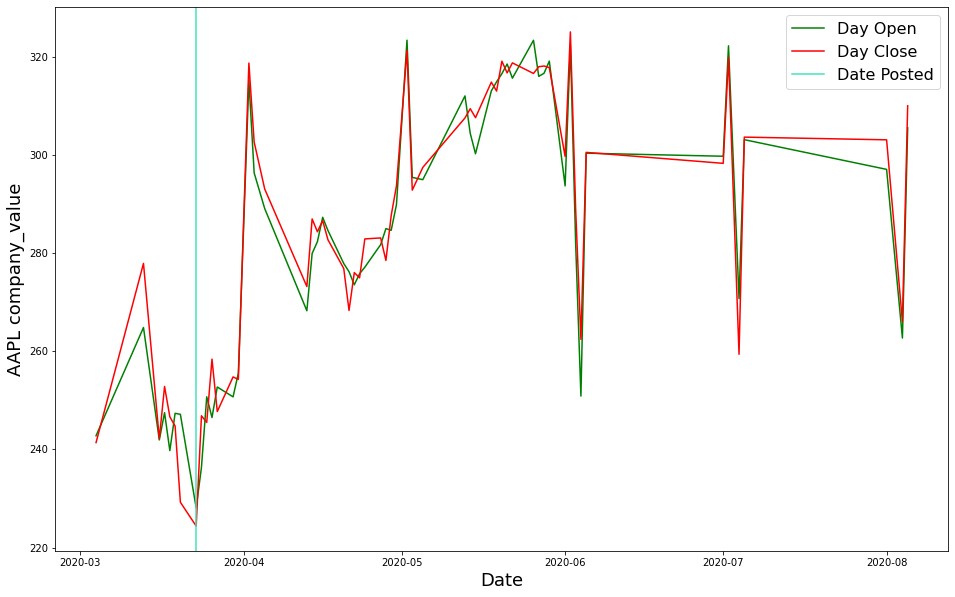

In [31]:
grp('AAPL' , '23-3-2020' , 20,  150)

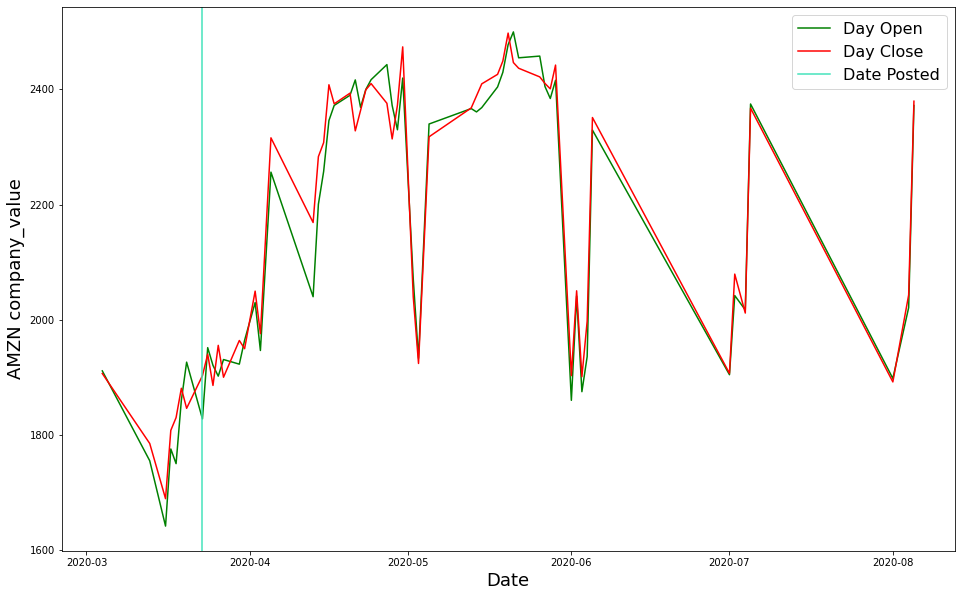

In [32]:
grp('AMZN' , '23-3-2020' , 20,  150)

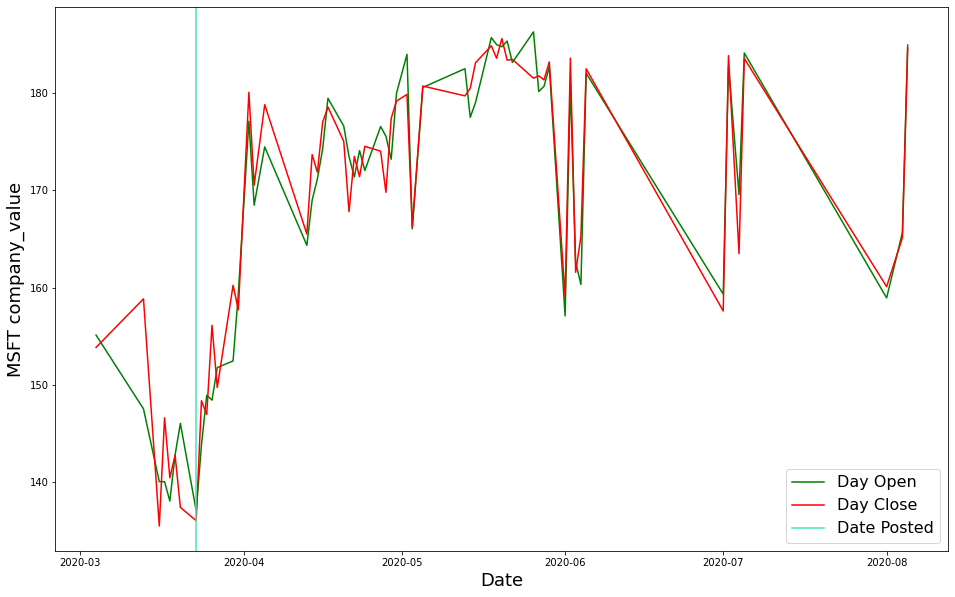

In [33]:
grp('MSFT' , '23-3-2020' , 20,  150)

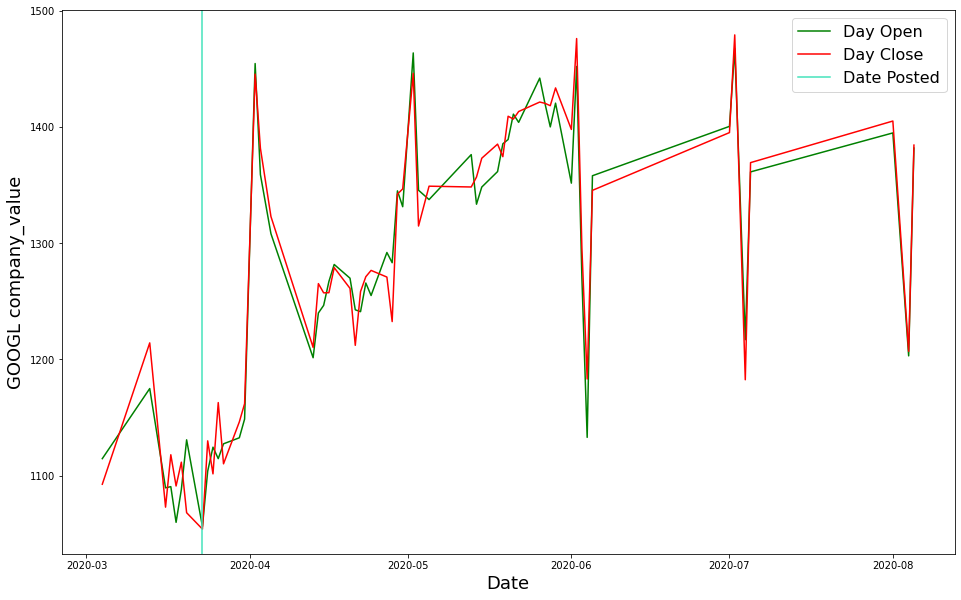

In [34]:
grp('GOOGL' , '23-3-2020' , 20,  150)

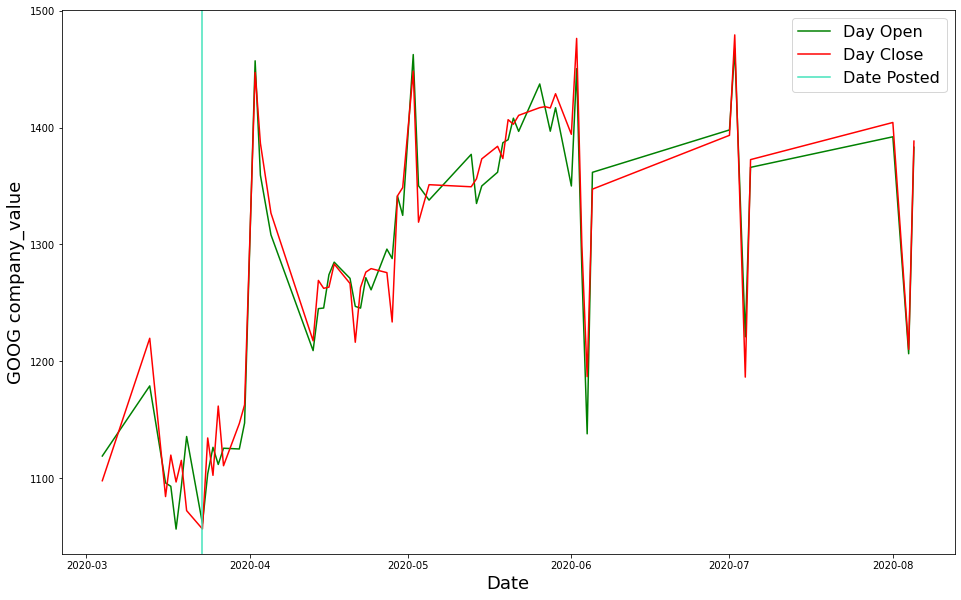

In [35]:
grp('GOOG' , '23-3-2020' , 20,  150)